<div>
    <img src="img/Logo.png" align="right" width="200"</img>
</div>
<br/> 

# MIP - Maximum Intensity Projection

In this exercise, we focus on visualizing a dataset. 
For this purpose we will use the Maximum Intensity Projection (MIP).

*"In scientific visualization, a maximum intensity projection (MIP) is a method for 3D data that projects in the visualization plane the voxels with maximum intensity that fall in the way of parallel rays traced from the viewpoint to the plane of projection."* (https://en.wikipedia.org/wiki/Maximum_intensity_projection)

In principle, orthogonal rays are traced through every voxel of the volumetric data set and the maximum along the ray is projected onto the image plane (see image below). 

<center><img src="./img/MIP-Example.png"></center>

## 1. Preparation

### 1.1 Convert DICOM data into NIfTI

To be able to work with the dataset in an uncomplicated way, we have to convert it from DICOM to NIfTI. **Herefor, run the following lines of code!** Alternatively, you can use the separate tool MRIcron (https://www.nitrc.org/projects/mricron).

In [1]:
pip install dicom2nifti

     |████████████████████████████████| 43 kB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 12.8 MB 5.9 MB/s eta 0:00:01
  Using cached nibabel-4.0.1-py3-none-any.whl (3.3 MB)
  Using cached pydicom-2.3.0-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import dicom2nifti

In [4]:
dicom2nifti.convert_directory('./data/CTdata/DICOM', './data/CTdata/')
#dicom2nifti.convert_directory(dicom_directory, output_folder)

### 1.2 Import dataset

In order to process the voxel data, they must be loaded into a suitable data structure. **To do this, run the following lines of code to load the data into the three-dimensional array $dataset$!** <br>For more information see: https://rylezhou.medium.com/how-to-plot-display-nifti-nii-medical-images-in-python-1368443fed77

In [5]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nibabel as nib

In [7]:
dataset = nib.load('./data/CTdata/21.nii.gz').get_fdata()
#dataset = nib.load(nifti_file).get_fdata()
dataset.shape

(806, 512, 226)

## 2. Task - Calculate MIP

Now that we have completed the preparation, it is your turn to calculate the MIP. **Calculate the MIP in axial, frontal and sagittal orientation!**

You are working with CT-data of an abdomen. **Which structures do you expect to be highlighted by the MIP?**

In [8]:
import numpy as np
import matplotlib.pyplot as plt

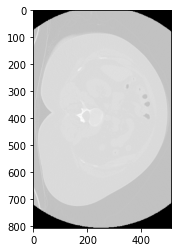

In [9]:
slice = dataset[:,:,113]
plt.imshow(slice)
plt.set_cmap(plt.gray())
plt.show()

xDim=dataset.shape[0]
yDim=dataset.shape[1]
zDim=dataset.shape[2]

### 2.1 Axial

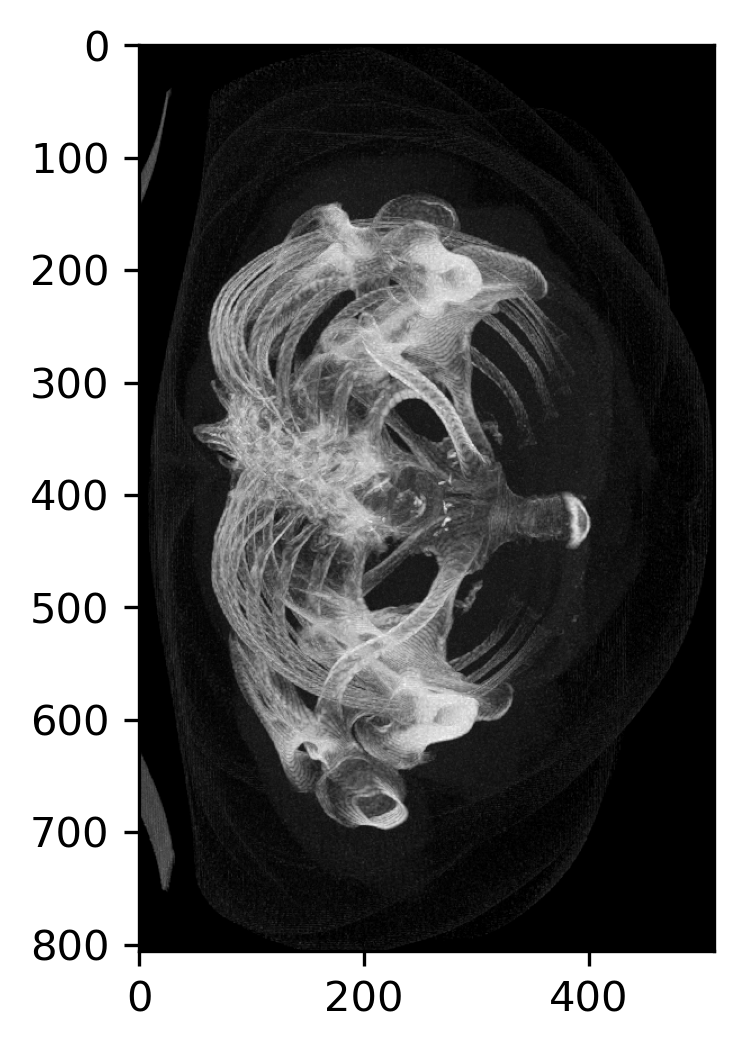

In [10]:
max = 0
resultZ = np.zeros(shape=[xDim,yDim], dtype=np.uint16)
for x in range(xDim):
    for y in range(yDim):
        max = 0
        for z in range(zDim):
            if dataset[x,y,z]>max:
                max=dataset[x,y,z]
        resultZ[x,y]=max

plt.figure(dpi=300)
plt.imshow(resultZ)
plt.set_cmap(plt.gray())
plt.show()

### 2.2 Frontal

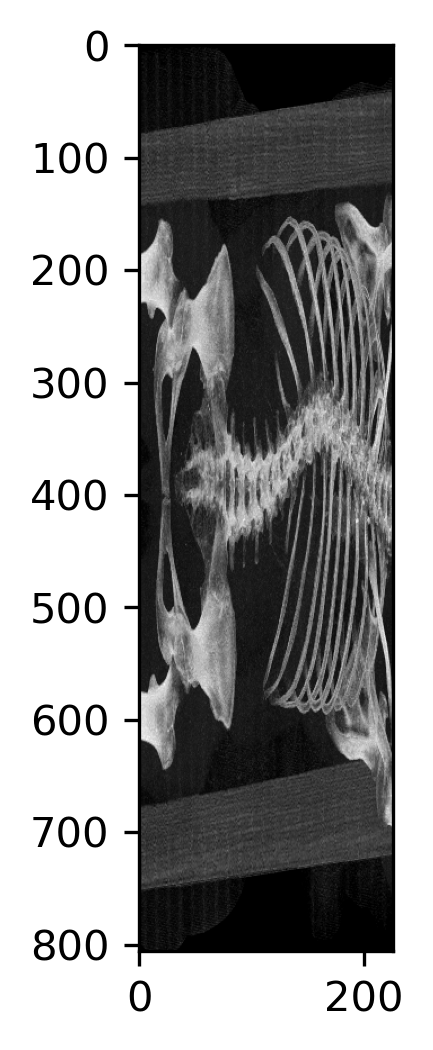

In [11]:
max = 0
resultY = np.zeros(shape=[xDim,zDim], dtype=np.uint16)
for x in range(xDim):
    for z in range(zDim):
        max = 0
        for y in range(yDim):
            if dataset[x,y,z]>max:
                max=dataset[x,y,z]
        resultY[x,z]=max

plt.figure(dpi=300)
plt.imshow(resultY)
plt.set_cmap(plt.gray())
plt.show()

### 2.3 Sagittal

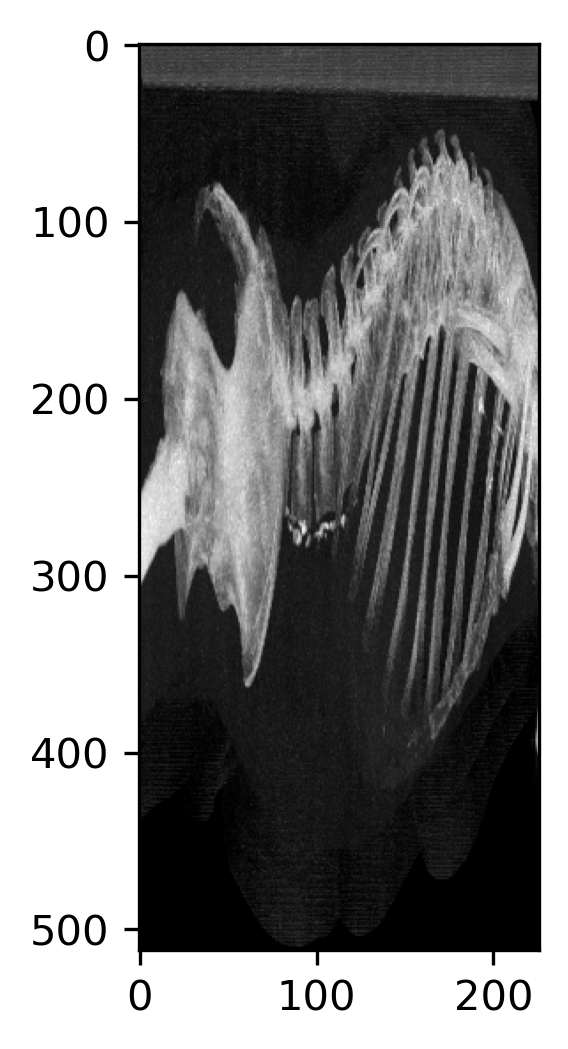

In [12]:
max = 0
resultX = np.zeros(shape=[yDim,zDim], dtype=np.uint16)
for y in range(yDim):
    for z in range(zDim):
        max = 0
        for x in range(xDim):
            if dataset[x,y,z]>max:
                max=dataset[x,y,z]
        resultX[y,z]=max

plt.figure(dpi=300)
plt.imshow(resultX)
plt.set_cmap(plt.gray())
plt.show()